In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from pathlib import Path

In [4]:
import matplotlib.pyplot as plt

In [12]:
file_loc = r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\final_outputs_glu_run\Figure_6_g1-mse_sctr.csv'

concat = pd.read_csv(file_loc).set_index(['channel','name', 'run_num']).drop('mouse_id', axis=1).drop('model_version', axis=1)

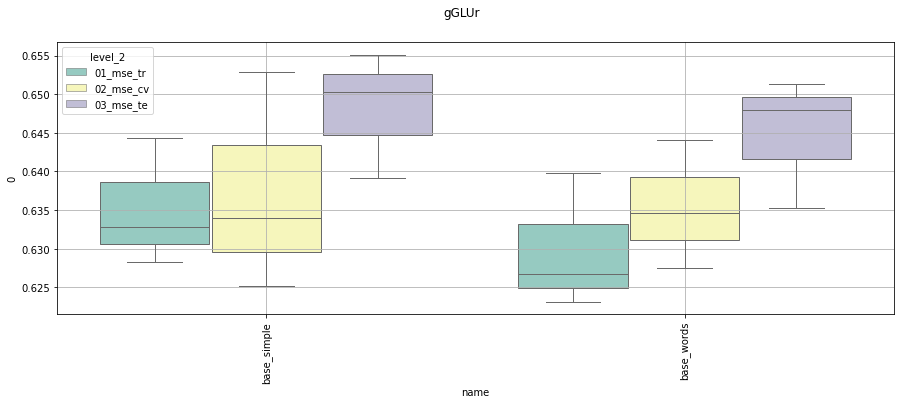

In [13]:
import seaborn as sns
for chl in concat.reset_index()['channel'].unique():
    
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    
    fig.suptitle(chl)
    fig.set_facecolor('w')
    
    vwyc = concat.loc[chl].values
    ymn, ymx = np.min(vwyc), np.max(vwyc)
    
    vbp = concat.loc[chl].rename({'mse_tr':'01_mse_tr', 'mse_cv':'02_mse_cv', 'mse_te':'03_mse_te'}, axis=1).stack().reset_index()
    sns.boxplot(data=vbp, x='name', y=0, hue='level_2', palette="Set3", linewidth=1, ax=ax)
    ax.grid(True)
    plt.xticks(rotation=90)